In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [3]:
class JointNormal1(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([params[0], 0.0], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())
    
    
class JointNormal2(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([0.0, params[0]], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())


def setup_shi(yn,xn):
    # model 1 grad, etc.
    nobs = yn.shape[0]
    model1_param = np.array([yn.mean()])
    model2_param = np.array([xn.mean()])
    
    model1_deriv = JointNormal1(yn,xn)
    ll1 = model1_deriv.loglikeobs(model1_param)
    grad1 =  model1_deriv.score_obs(model1_param).reshape( (nobs,1) )
    hess1 = model1_deriv.hessian(model1_param)
    
    
    model2_deriv = JointNormal2(yn,xn)
    ll2 = model2_deriv.loglikeobs(model2_param)
    grad2 =  model2_deriv.score_obs(model2_param).reshape( (nobs,1) )  
    hess2 = model2_deriv.hessian(model2_param)
    
    return ll1,grad1,hess1,model1_param,ll2,grad2,hess2,model2_param

def gen_data(beta= 1.5, nobs=1000):
    cov = [[25, 0], [0, 1]]
    data = np.random.multivariate_normal([beta,beta], [[25,0],[0,1]],  nobs)
    return data[:,0],data[:,1],nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn)
print(grad1.shape,hess1.shape)

(1000, 1) (1, 1)


../figs/ex2beta0


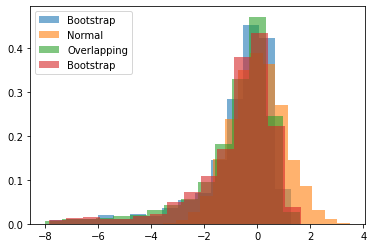

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.777 & 2.317 & -7.298 & 25.919 & -7.275 & 41.770 \\
Bootstrap & -0.782 & 2.441 & -7.322 & 25.933 & -7.299 & 43.547 \\
Normal & 0.012 & 1.012 & 0.008 & -0.053 & 0.008 & 3.019 \\
Overlapping & -0.811 & 2.433 & -7.266 & 24.490 & -7.261 & 42.199 \\
\bottomrule
\end{tabular}
\end{center}


In [15]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta0')

../figs/ex2beta5


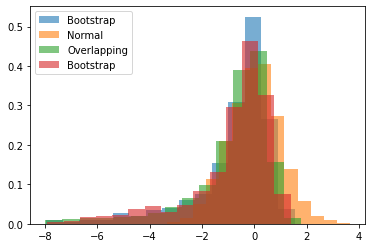

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.790 & 2.387 & -7.205 & 24.564 & -7.183 & 41.402 \\
Bootstrap & -0.880 & 2.667 & -7.486 & 19.858 & -7.463 & 40.975 \\
Normal & 0.009 & 0.985 & -0.034 & 0.149 & -0.034 & 3.057 \\
Overlapping & -0.848 & 2.578 & -8.106 & 28.186 & -8.101 & 48.064 \\
\bottomrule
\end{tabular}
\end{center}


In [16]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta5')

../figs/ex2beta10


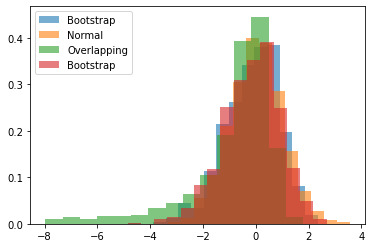

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.152 & 1.086 & -0.587 & 0.391 & -0.585 & 3.914 \\
Bootstrap & -0.173 & 1.159 & -0.535 & 0.484 & -0.533 & 4.495 \\
Normal & 0.013 & 0.991 & -0.015 & 0.040 & -0.015 & 2.982 \\
Overlapping & -0.844 & 2.568 & -8.010 & 27.813 & -8.005 & 47.539 \\
\bottomrule
\end{tabular}
\end{center}


In [17]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta10')

../figs/ex2beta15


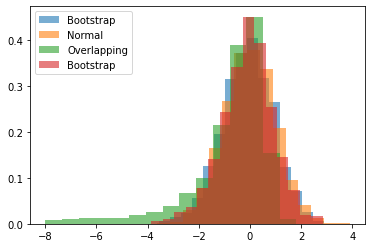

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.100 & 1.018 & -0.181 & 0.065 & -0.180 & 3.161 \\
Bootstrap & -0.103 & 1.029 & -0.317 & 0.550 & -0.316 & 3.709 \\
Normal & -0.014 & 0.995 & 0.015 & -0.088 & 0.015 & 2.876 \\
Overlapping & -0.788 & 2.363 & -7.449 & 27.457 & -7.444 & 44.154 \\
\bottomrule
\end{tabular}
\end{center}


In [18]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.5)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta15')

../figs/ex2beta15


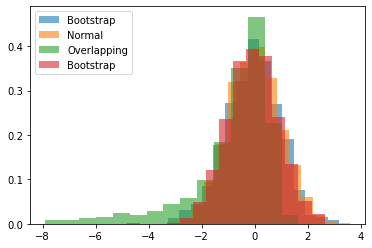

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.076 & 1.053 & -0.137 & 0.184 & -0.137 & 3.497 \\
Bootstrap & -0.063 & 0.929 & -0.090 & 0.279 & -0.090 & 2.859 \\
Normal & 0.006 & 0.998 & 0.035 & -0.029 & 0.035 & 2.958 \\
Overlapping & -0.827 & 2.504 & -7.482 & 24.118 & -7.477 & 42.876 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=2)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta20')